### 模板案例说明
该案例代码可以实际工作场景进行修改修改和套用。

#### 目的：

基于现有的渠道销售数据做回归预测。


#### 使用场景；

这段模型可以用在一些简易快速的场景上，例如根据一些渠道交易数据，来预测销售额。此套案例模板使用方法：
1. 实际相关数据可以套进来，例如：渠道A、渠道B、渠道C
2. 可添加更多其他回归算法

#### 模板案例演示

In [1]:
# 导入库
import pandas as pd
import numpy as np

from sklearn.linear_model import BayesianRidge, ElasticNet                # 贝叶斯岭回归、ElasticNet回归算法
from sklearn.svm import SVR                                               # SVM中的回归算法
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.preprocessing import StandardScaler                          # 数据标准化
from sklearn.metrics import explained_variance_score, mean_absolute_error, \
mean_squared_error, r2_score                                              # 批量导入评估指标
import matplotlib.pyplot as plt                                           # 导入图形展示库

# 忽略警告信息
import warnings
warnings.filterwarnings('ignore')

# array类型不使用科学计数
np.set_printoptions(suppress=True)

# array类型数据输出全部显示
np.set_printoptions(threshold=np.inf)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


### 数据准备

下图可以看到，数据直接为array类型数据，方便案例演示。并且在本篇案例中，避免了关于数据预处理的一些操作，如：异常值、重复值、缺失值等。

In [3]:
# 读取数据文件
raw_data = np.loadtxt('/regression.txt')  
raw_data[10]

array([  0.22489,  12.5    ,   7.87   ,   0.     ,   0.524  ,   6.377  ,
        94.3    ,   6.3467 ,   5.     , 311.     ,  15.2    , 392.52   ,
        20.45   ,  15.     ])

In [4]:
# 分割自变量,因变量。前面自变量是各个渠道广告效果，属于特征，最后一列是因变量销售额
X_raw,y = raw_data[:, :-1],raw_data[:, -1]  

model_ss = StandardScaler()

# 直接使用fit_transform方法做数据标准化
X = model_ss.fit_transform(X_raw)

In [5]:
# 拆分数据集,取70%数据做训练集
num = int(X.shape[0]*0.7)
X_train,X_test = X[:num,:],X[num:,:] # 拆分训练集和测试集
y_train,y_test = y[:num],y[num:] # 拆分训练集和测试集

自变量 X 拥有 506 个样本，13 个特征变量。然后将 X 和 y 分别取前 70% 的数据，用于训练和测试。

### 初选回归模型

这里选择了一些比较常用的回归模型。

In [12]:
# 不同模型的名称列表
model_names = ['BayesianRidge', 'ElasticNet', 'SVR', 'GBR'] 

# 建立贝叶斯岭回归模型对象
model_br = BayesianRidge()  

# 建立弹性网络回归模型对象
model_etc = ElasticNet(random_state=0)  

# 建立支持向量机回归模型对象
model_svr = SVR(gamma='scale')  

# 建立梯度增强回归模型对象
model_gbr = GradientBoostingRegressor(random_state=0)  

# 不同回归模型对象的集合
model_list = [model_br,  model_etc,model_svr, model_gbr]  

# 各个回归模型预测的y值列表
pre_y_list = [model.fit(X_train, y_train).predict(X_test) for model in model_list] 
pre_y_list

[array([12.60705801, 15.39677707, 21.64650534, 22.05485043, 20.44458174,
        19.19950575, 21.89592112, 19.43321496, 11.93976596, 16.76258764,
        45.27542509, -3.20584282,  7.91125016, -0.63054384, 10.65639014,
        27.58165756, 31.32810097, 23.01631023, 20.55711238,  9.36734407,
         4.65032418, 36.47299004, 27.65707169, 27.42491823, 28.35123177,
        24.8559188 , 57.56322718, 27.13638359, 15.03210469, 14.41160033,
         6.60518655, 14.85577428, 11.92783588, 14.5364845 ,  9.83738982,
        13.5179192 , 16.30568933, 18.87958258, 11.05294597, 21.86957033,
        20.5262448 , 23.97574601, 22.37418051, 16.78640275, 23.98114853,
        17.91308511, 24.47494892, 24.57466245, 23.18409636, 19.3036903 ,
        25.83071369, 37.16561649,  6.54986315, 17.46850036, 14.61170319,
        27.27826788, 28.97250557, 23.36468358,  5.05138323, 16.98835051,
        13.41415732, 21.16108095, 22.46249243, 15.6951218 , 37.05236998,
        24.26366545, 23.2517486 , 18.24787083, 17.3

### 模型效果评估

In [66]:
# 总样本量,总特征数
n_samples, n_features = X.shape  

# 回归评估指标对象集
model_metrics_functions = [explained_variance_score, mean_absolute_error, mean_squared_error,r2_score]  

# 回归评估指标列表
model_metrics_list = [[m(y_test, pre_y_list[i]) for m in model_metrics_functions] for i in range(len(model_list))]  

# 建立回归指标的数据dataframe
regresstion_score = pd.DataFrame(model_metrics_list, index=model_names,
                   columns=['explained_variance', 'mae', 'mse', 'r2'])  


# 打印输出样本量和特征数量
print('all samples: %d \t features: %d' % (n_samples, n_features),'\n','-'*60) 

# 打印输出标题
print('\n','regression metrics:','\n','-'*60)  

# 打印输出回归指标的数据框
print(regresstion_score)  

all samples: 506 	 features: 13 
 ------------------------------------------------------------

 regression metrics: 
 ------------------------------------------------------------
               explained_variance       mae         mse        r2
BayesianRidge           -0.687361  7.659193  121.319137 -0.828575
ElasticNet               0.071882  6.291600   70.266387 -0.059086
SVR                     -0.000399  8.283070  104.300648 -0.572065
GBR                      0.230326  4.929874   53.346174  0.195943


评估指标可以看到，在这几个模型中，使用GBR回归模型的效果最好

我们其实有很多方法还可以继续提升效果：

- 增加更多的特征理解和预处理（除了标准化，还有异常值等处理）；
- 增加特征工程（例如降维来减少噪音影响、特征选择或派生，甚至直接让业务提供更多的可用维度）；
- 更多的模型测试和调参等。

### 模型效果可视化

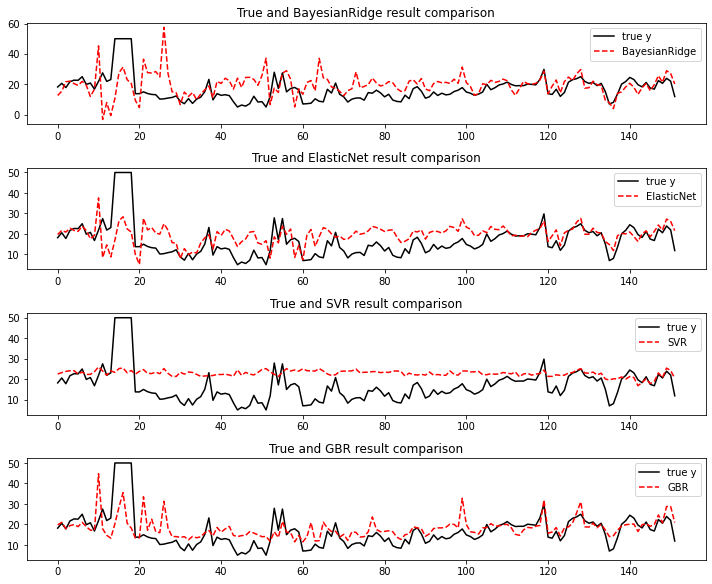

In [67]:
# 创建画布
plt.figure(figsize=(10, 10))  

# 读出通过回归模型预测得到的索引及结果
for i, pre_y in enumerate(pre_y_list):  
    plt.subplot(len(pre_y_list)+1,1,i+1)
    plt.plot(np.arange(len(y_test)), y_test, color='k', label='true y')  # 画出原始值的曲线
    plt.plot(np.arange(len(y_test)), pre_y_list[i], 'r--', label=model_names[i])  # 画出每条预测结果线
    plt.title('True and {} result comparison'.format(model_names[i]))  # 标题
    plt.legend(loc='upper right')  # 图例位置
    plt.tight_layout() # 自动调整子图间隔

plt.plot分别输出了真实结果和预测结果数据，真实结果是实线，预测结果是虚线。通过可视化也可以看出，GBR回归模型的效果最好。那么在接下来进行模型应用的时候，选择GBR回归算法来进行预测。

### 模型应用

In [59]:
print('regression prediction','\n','-'*40)

# 要预测的新数据集
new_point_set = [[1.05393, 0., 8.14, 0., 0.538, 5.935, 29.3, 4.4986, 4., 307., 21., 386.85, 6.58],
                 [0.7842, 0., 8.14, 0., 0.538, 5.99, 81.7, 4.2579, 4., 307., 21., 386.75, 14.67],
                 [0.80271, 0., 8.14, 0., 0.538, 5.456, 36.6, 3.7965, 4., 307., 21., 288.99, 11.69],
                 [0.7258, 0., 8.14, 0., 0.538, 5.727, 69.5, 3.7965, 4., 307., 21., 390.95,
                  11.28]]  


# 循环读出每个要预测的数据点
for i, new_point in enumerate(new_point_set):  
    x_matrix = np.array(new_point).reshape(1, -1)
    x_scaled = model_ss.transform(x_matrix)
    new_pre_y = model_gbr.predict(x_scaled)  # 使用GBR进行预测
    print('predict for new point %d is:  %.2f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息

regression prediction 
 ----------------------------------------
predict for new point 1 is:  22.30
predict for new point 2 is:  17.18
predict for new point 3 is:  18.94
predict for new point 4 is:  18.36
